In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy
from scipy import io
import torch
import pickle

In [54]:
for target in range(8):
    temp = monkey_T[target]
    
    spike_list = []
    handpos_list = []
    
    max_time_length = 0
    min_time_length = np.inf
    
#     print(f'Traget: {target+1}')
    for trial in range(100):
        spike = temp[trial][1]
        handpos = temp[trial][2]
        
        spike_list.append(spike)
        handpos_list.append(handpos)
        
        if max_time_length < spike.shape[1]:
            max_time_length = spike.shape[1]
        
        if min_time_length > spike.shape[1]:
            min_time_length = spike.shape[1]
#         print(f'movement time length: {spike.shape}')

In [55]:
max_time_length

742

In [56]:
min_time_length

574

In [73]:
for target in range(8):
    temp = monkey_T[target]

    for trial in range(100):
        spike = temp[trial][1]
        handpos = temp[trial][2]
        
        if max_time_length > spike.shape[1]:
            pad_length =  max_time_length - spike.shape[1]
            pad_spike = spike[:,:pad_length]
            pad_handpos = handpos[:,:pad_length]
            
            padded_spike = np.concatenate((pad_spike, spike), axis=1)
            padded_handpos = np.concatenate((pad_handpos, handpos), axis=1)
            
        monkey_T[target][trial][1] = padded_spike
        monkey_T[target][trial][2] = padded_handpos

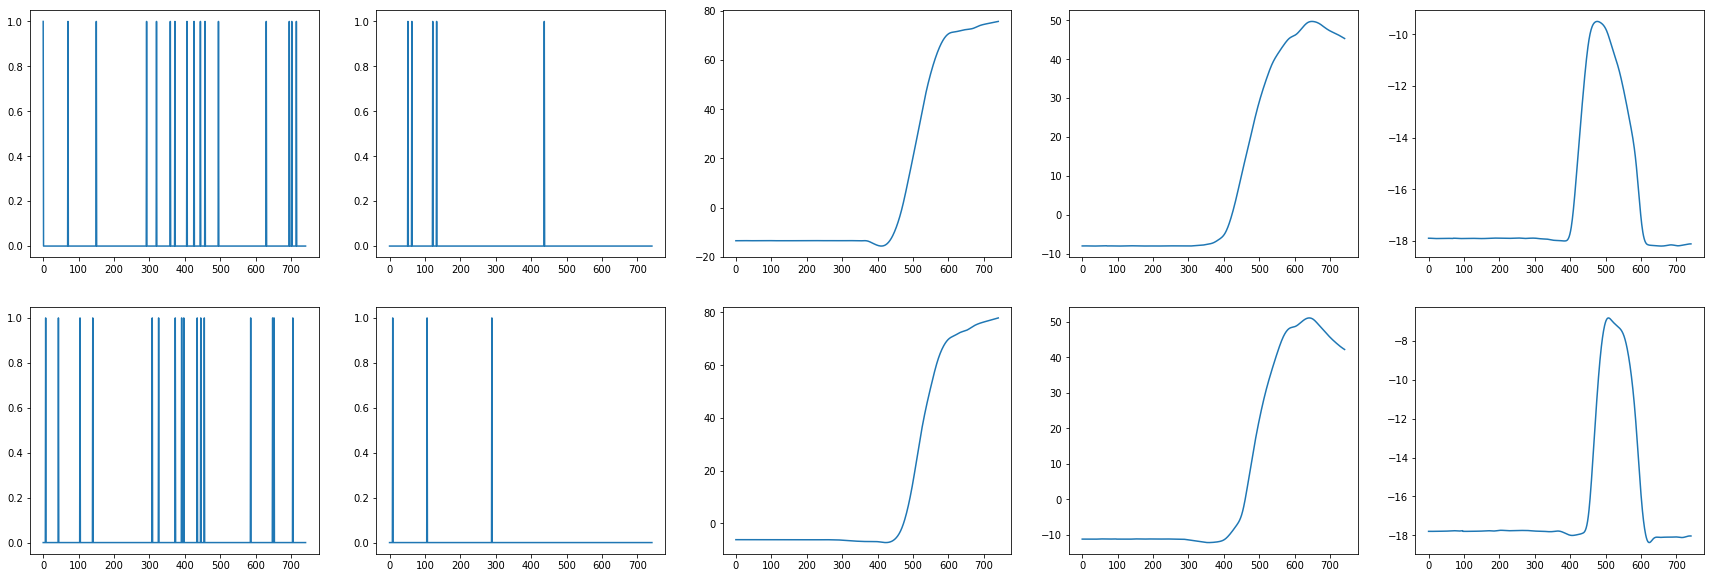

In [84]:
f,ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

row = 0
for target in range(1):
    for trial in range(2):
        for neurons in range(2):
            ax[row, neurons].plot(monkey_T[target][trial][1][neurons])
        ax[row, 2].plot(monkey_T[target][trial][2][0])
        ax[row, 3].plot(monkey_T[target][trial][2][1])
        ax[row, 4].plot(monkey_T[target][trial][2][2])
        
        row+=1

In [105]:
total_spike = []
total_handpos = []


for target in range(8):
    temp = monkey_T[target]
    
    spike_list = []
    handpos_list = []
    
    for trial in range(100):
        spike = temp[trial][1]
        handpos = temp[trial][2]
        
        spike_list.append(spike)
        handpos_list.append(handpos)
    
    total_spike.append(np.stack(spike_list))
    total_handpos.append(np.stack(handpos_list))

total_spike = np.stack(total_spike)
total_handpos = np.stack(total_handpos)

## Dataset 

In [4]:
from torch_geometric.data import Data

In [7]:
dataset = pickle.load(open('./data/CCN/monkeydata.pickle', 'rb'))

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
dataset.shape

torch.Size([8, 100, 101, 742])

In [9]:
x = dataset[0,0,-3,:]
y = dataset[0,0,-2,:]
z = dataset[0,0,-1,:]

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17112/4213071327.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


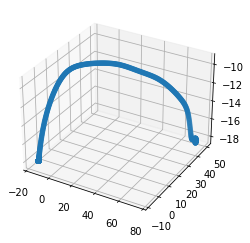

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x, y, z)

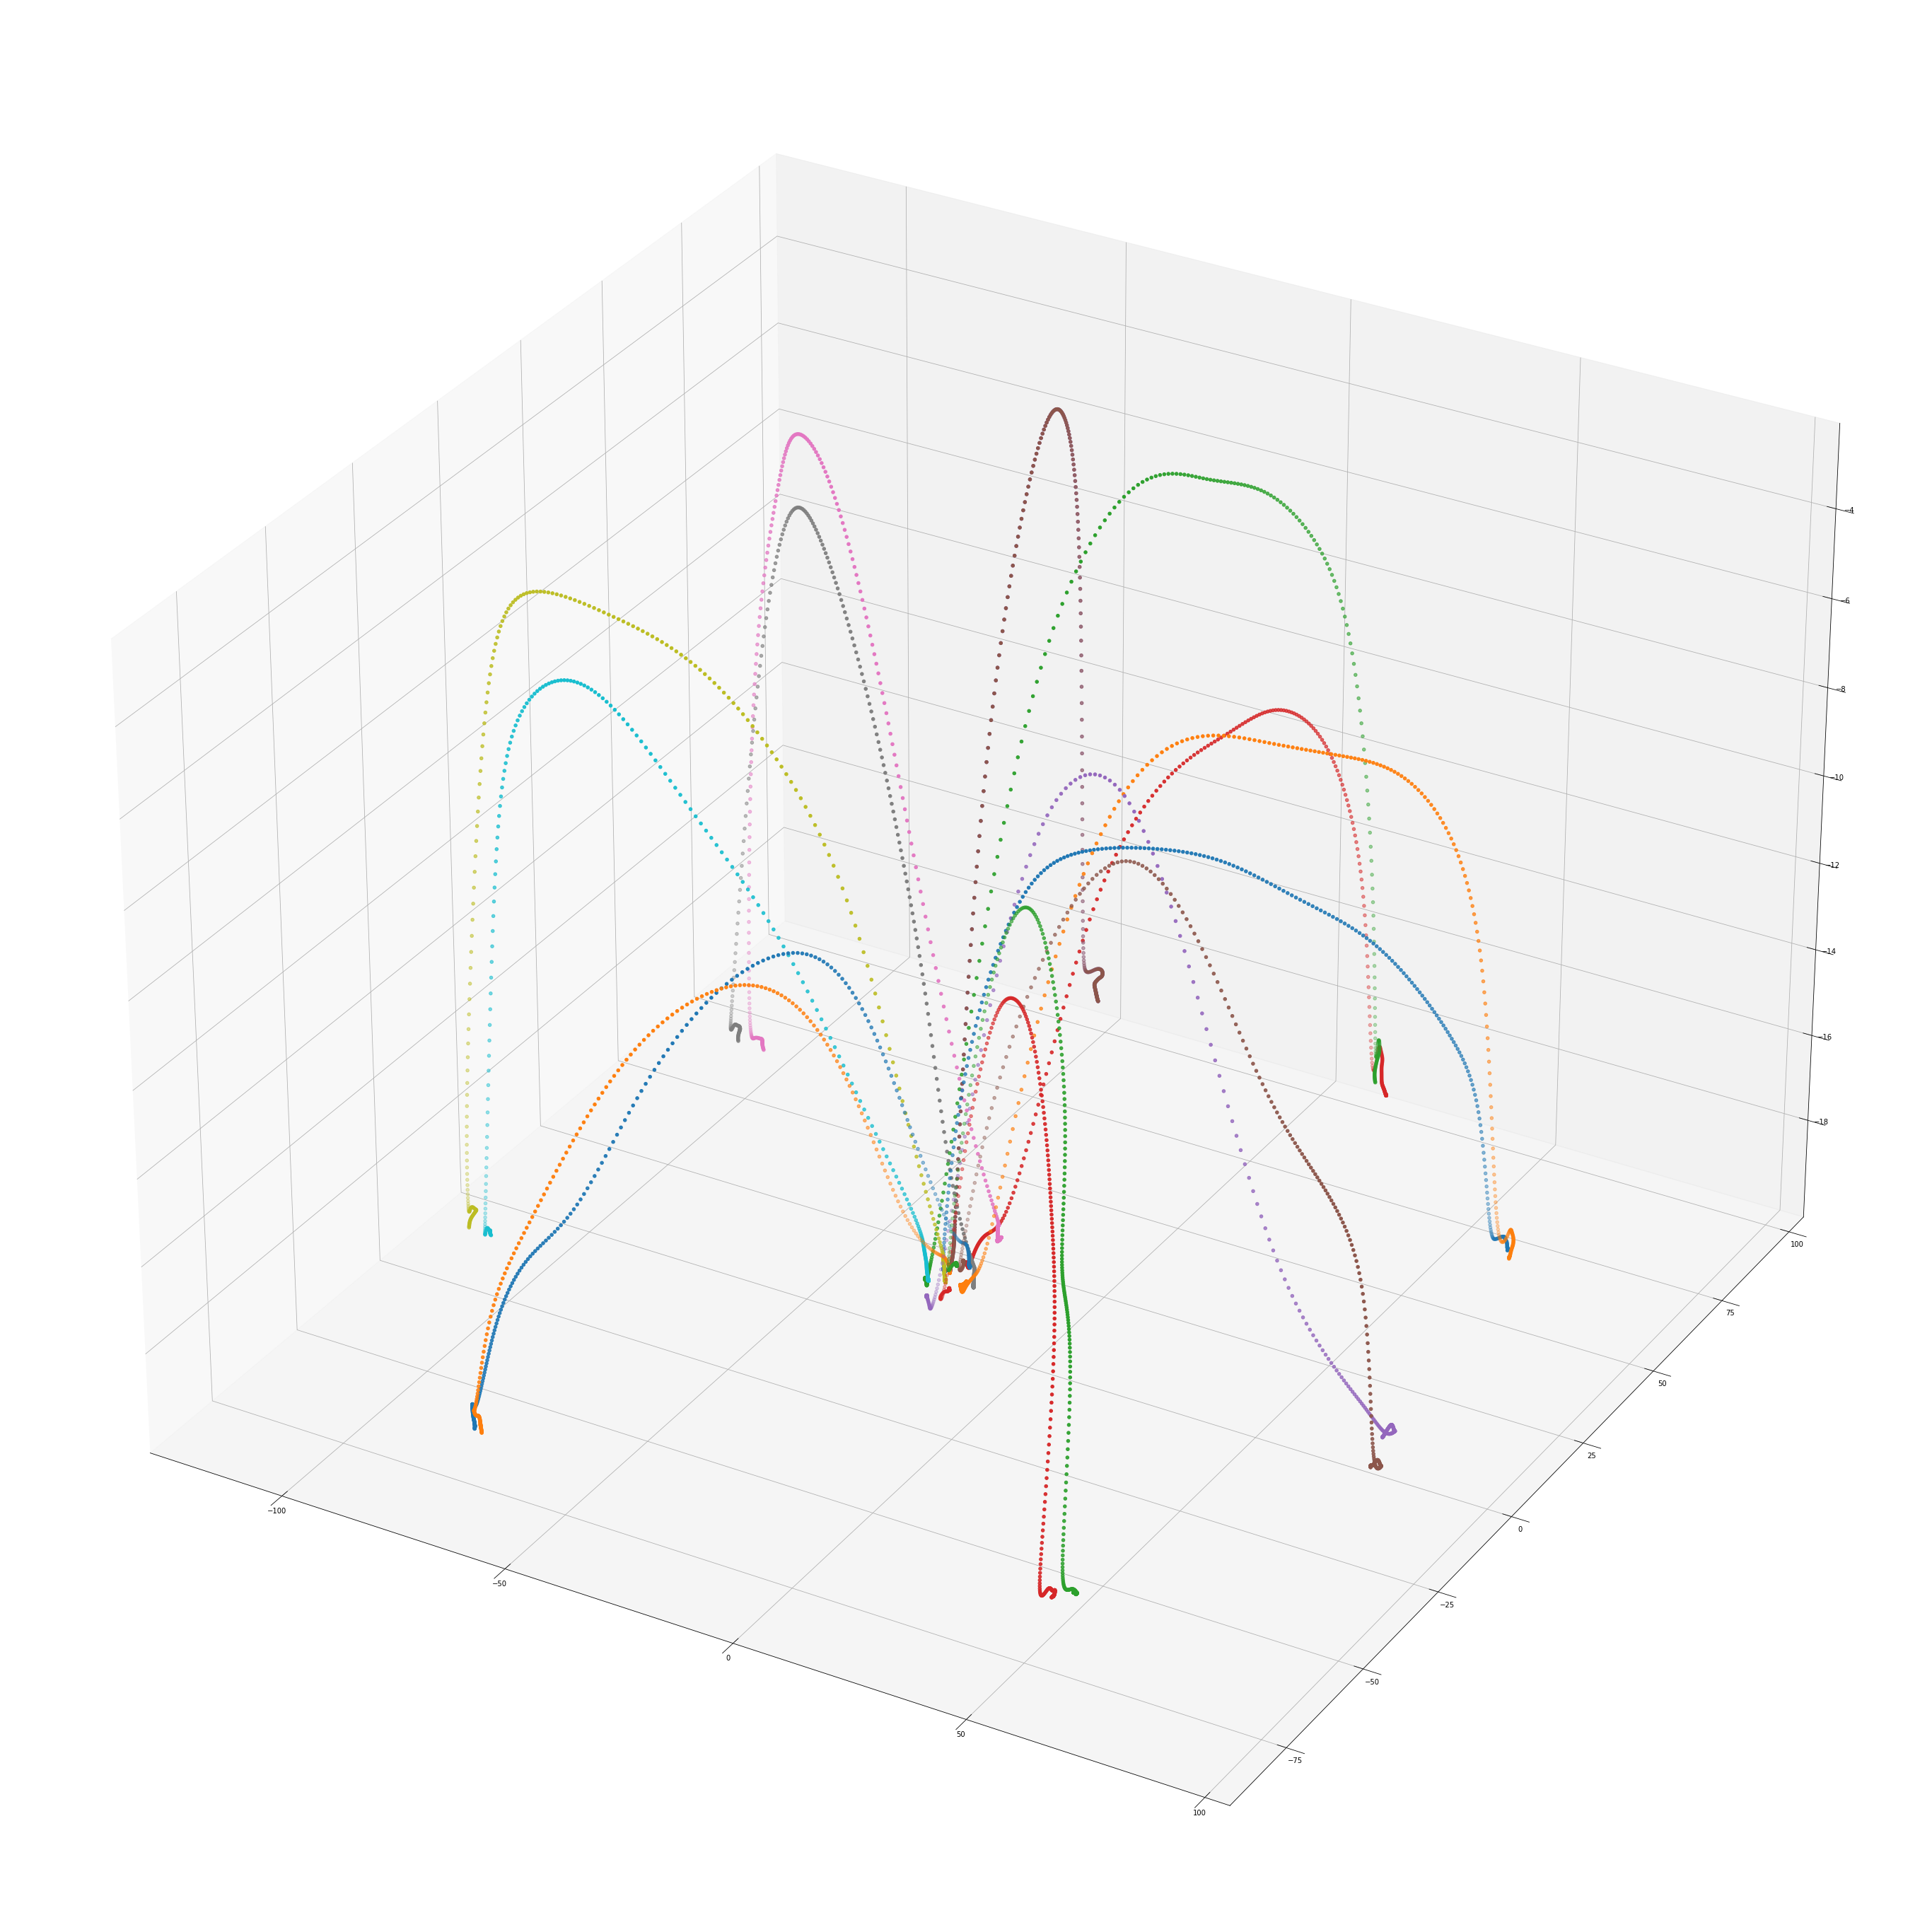

In [24]:
fig, ax = plt.subplots(figsize=(50,50), subplot_kw={"projection": "3d"})

for angle in range(8):
    for trial in range(2):
        x = dataset[angle,trial,-3,:]
        y = dataset[angle,trial,-2,:]
        z = dataset[angle,trial,-1,:]
        
        ax.scatter(x, y, z)

In [ ]:
dataset.shape

In [8]:
dataset[0][0]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
train = dataset[:, :80, :, :]
valid = dataset[:,80:90, :, :]
test = dataset[:, 90:, :, :]

In [43]:
total_time_length = 742

window_size = 212
slide = 53

In [44]:
valid_sampling_locations = []
valid_sampling_locations += [
    (window_size + i)
    for i in range(total_time_length - window_size + 1)
    if (i % slide) == 0
]

In [85]:
valid_sampling_locations

[212, 265, 318, 371, 424, 477, 530, 583, 636, 689, 742]

In [214]:
train.shape

(8, 80, 98, 742)

In [215]:
entire = train.reshape(-1,98,742)

In [219]:
entire.shape

(640, 98, 742)

In [275]:
data_list = []
idx=0
for target in range(8):
    for trial in range(train.shape[1]):
        spike_data = []
        for start_idx in valid_sampling_locations:
            one_cell_inputs = train[target, trial, :, (start_idx-window_size):start_idx]
            spike_data.append(one_cell_inputs)
            
        spike_inputs = np.stack(spike_data, axis=1)
        data_item = Data(x=torch.Tensor(spike_inputs), edge_index=None, y=[target, idx])
        data_list.append(data_item)
        idx += 1

In [276]:
len(data_list)

640

In [211]:
gl_input = train[target, trial, :, :]

In [212]:
gl_input.shape

(98, 742)

In [209]:
spike_inputs.shape

(98, 11, 212)

In [213]:
gl_input.reshape(98,1,742).shape

(98, 1, 742)

In [307]:
indexs = np.stack(data_batch.y, axis=0)[:,1]

In [305]:
entire[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [315]:
gl = [entire[i] for i in indexs]

In [312]:
np.array(gl).shape

(10, 98, 742)

In [316]:
entire_input = torch.FloatTensor(np.array(gl))

In [277]:
from torch_geometric.loader import DataLoader

In [278]:
dataloader = DataLoader(data_list, batch_size=10, shuffle=True)

In [279]:
data_batch = next(iter(dataloader))

In [280]:
data_batch.x.shape

torch.Size([980, 11, 212])

In [325]:
target = np.stack(data_batch.y, axis=0)[:,0]

In [326]:
np.stack(data_batch.y, axis=0)[:,1]

array([528,  23, 292, 188, 325, 314, 606, 418, 151, 214])

In [327]:
import torch.nn.functional as F

In [328]:
F.one_hot(torch.Tensor(target).to(torch.int64), num_classes=8)

tensor([[0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0]])

In [265]:
data_batch.y.item

AttributeError: 'list' object has no attribute 'item'

In [329]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([0, 2, 3])

In [330]:
torch.randn(3, 5)

tensor([[-1.3615, -0.0402,  0.1032, -1.0814,  0.0690],
        [ 0.0137,  0.1608,  0.8824,  1.4616,  0.9568],
        [ 0.5719,  0.4299,  0.4928,  1.3695,  0.1135]])

In [333]:
loss = nn.CrossEntropyLoss()

In [334]:
input = torch.randn(3, 5)
target = torch.empty(3, dtype=torch.long).random_(5)

In [335]:
output = loss(input, target)

In [336]:
output

tensor(1.8482)